# House Prices - Advanced Regression Techniques
## Baseline model - Linear Regression with 15 features
## Goal
To predict the sales price for each house
## Metric
Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price

## Import

In [61]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [62]:
df = pd.read_csv('../Data/train.csv')

In [63]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
df.shape

(1460, 81)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [66]:
# Eliminate 3 features as they have low correlation with price
features = [
    'MSSubClass',
    'MSZoning',
    'LotFrontage',
    'LotArea',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
#     'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'MasVnrArea',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinSF1',
    'BsmtFinType2',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'KitchenQual',
    'TotRmsAbvGrd',
    'Functional',
    'Fireplaces',
    'FireplaceQu',
    'GarageType',
    'GarageYrBlt',
    'GarageFinish',
    'GarageCars',
    'GarageArea',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'PoolQC',
    'Fence',
    'MiscFeature',
#     'MiscVal',
#     'MoSold',
    'YrSold',
    'SaleType',
    'SaleCondition'
]

### Preprocessing (eliminate nan)

In [67]:
df_test = pd.read_csv('../Data/test.csv')

In [68]:
df_test['SalePrice'] = 0 # starts with id 1461

In [69]:
df_united = pd.concat([df, df_test])
df_united

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,0


In [70]:
# replacing error in 'GarageYrBlt', id - 2593
df_united['GarageYrBlt'] = df_united['GarageYrBlt'].replace([2207], [2007])

In [71]:
df_united.columns[df_united.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [72]:
features_with_nulls = [
    'LotFrontage', # 486 NaNs, need to think how to fill them
]
features_with_nulls_to_mean = [
    'MasVnrArea', # 23 NaNs, will make them mean
    'BsmtFinSF1', # 1 NaNs, will make them mean
    'BsmtFinSF2', # 1 NaNs, will make them mean
    'BsmtUnfSF', # 1 NaNs, will make them mean
    'TotalBsmtSF', # 1 NaNs, will make them mean
    'BsmtFullBath', # 2 NaNs, will make them mean
    'BsmtHalfBath', # 2 NaNs, will make them mean
    'GarageYrBlt', # 159 NaNs, will make them mean
    'GarageCars', # 1 NaNs, will make them mean
    'GarageArea', # 1 NaNs, will make them mean
]
features_with_nulls_to_undef = [
    'MSZoning', # 4 NaNs, will make them 'Undefined'
    'Utilities', # 2 NaNs, will make them 'Undefined'
    'Exterior1st', # 1 NaNs, will make them 'Undefined'
    'Exterior2nd', # 1 NaNs, will make them 'Undefined'
    'Electrical', # 1 NaNs, will make them 'Undefined'
    'KitchenQual', # 1 NaNs, will make them 'Undefined'
]
features_with_nulls_to_no_basement = [
    'BsmtQual', # 81 NaNs, will make them 'No_basement'
    'BsmtCond', # 82 NaNs, will make them 'No_basement'
    'BsmtExposure', # 82 NaNs, will make them 'No_basement'
    'BsmtFinType1', # 79 NaNs, will make them 'No_basement'
    'BsmtFinType2', # 80 NaNs, will make them 'No_basement'
    'FireplaceQu', # 1420 NaNs, will make them 'No_basement'
]
features_with_nulls_to_no_garage = [
    'GarageType', # 157 NaNs, will make them 'No_garage'
    'GarageFinish', # 159 NaNs, will make them 'No_garage'
    'GarageQual', # 159 NaNs, will make them 'No_garage'
    'GarageCond', # 159 NaNs, will make them 'No_garage'
]
features_with_nulls_to_other = [
    'PoolQC', # 2909 NaNs, will make them 'No_pool'
    'Fence', # 2348 NaNs, will make them 'No_fence'
    'MiscFeature', # 2814 NaNs, will make them 'No_MiscFeature'
    'SaleType'# 1 NaNs, will make them 'Oth'
    'Alley', # 2721 NaNs, will make them 'No_alley_access'
    'MasVnrType', # 24 NaNs, will make them 'No_Masonry_veneer'
    'Functional', # 2 NaNs, will make them 'Typ'
]

In [73]:
for i in features_with_nulls_to_undef:
    df_united[i].fillna('Undefined', inplace = True)

for i in features_with_nulls_to_no_basement:
    df_united[i].fillna('No_basement', inplace = True)

for i in features_with_nulls_to_mean:
    df_united[i].fillna(df_united[i].mean(), inplace = True)

for i in features_with_nulls_to_no_garage:
    df_united[i].fillna('No_garage', inplace = True)

# Filling NaN in united DF
df_united['PoolQC'].fillna('No_pool', inplace = True)
df_united['Fence'].fillna('No_fence', inplace = True)
df_united['MiscFeature'].fillna('No_MiscFeature', inplace = True)
df_united['SaleType'].fillna('Oth', inplace = True)
df_united['Alley'].fillna('No_alley_access', inplace = True)
df_united['MasVnrType'].fillna('No_Masonry_veneer', inplace = True)
df_united['Functional'].fillna('Typ', inplace = True)

# Filling NaN in united origin DF (train)
for i in features_with_nulls_to_undef:
    df[i].fillna('Undefined', inplace = True)

for i in features_with_nulls_to_no_basement:
    df[i].fillna('No_basement', inplace = True)

for i in features_with_nulls_to_mean:
    df[i].fillna(df[i].mean(), inplace = True)

for i in features_with_nulls_to_no_garage:
    df[i].fillna('No_garage', inplace = True)

df['PoolQC'].fillna('No_pool', inplace = True)
df['Fence'].fillna('No_fence', inplace = True)
df['MiscFeature'].fillna('No_MiscFeature', inplace = True)
df['SaleType'].fillna('Oth', inplace = True)
df['Alley'].fillna('No_alley_access', inplace = True)
df['MasVnrType'].fillna('No_Masonry_veneer', inplace = True)
df['Functional'].fillna('Typ', inplace = True)

df_united.columns[df.isnull().any()].tolist() # unpreprocessed feature

['LotFrontage']

### Finding categorical features and one hot encoding

In [74]:
for i in df_united.columns:
    print(i)
    print(df_united[i].unique())
    print(df_united[i].dtype)
    print()

Id
[   1    2    3 ... 2917 2918 2919]
int64

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
int64

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH' 'Undefined']
object

LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]
float64

LotArea
[ 8450  9600 11250 ...  1894 20000 10441]
int64

Street
['Pave' 'Grvl']
object

Alley
['No_alley_access' 'Grvl' 'Pave']
obje

In [193]:
cat_features = [
    'MSSubClass',
    'MSZoning',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
#     'LandSlope', low variance in price
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'OverallQual',
    'OverallCond',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'PoolQC',
    'Fence',
    'MiscFeature',
#     'MoSold',# low variance in price
#     'YrSold', #low variance in price, but have to think about adding inflation
    'SaleType',
    'SaleCondition'
]

MSSubClass | STD/MEAN = 0.26


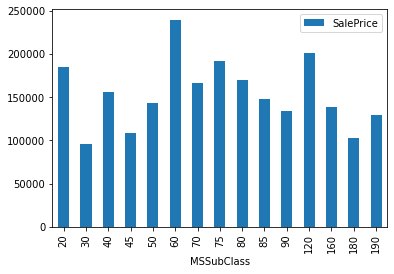

MSZoning | STD/MEAN = 0.38


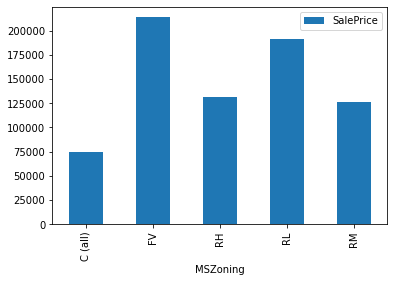

Street | STD/MEAN = 0.23


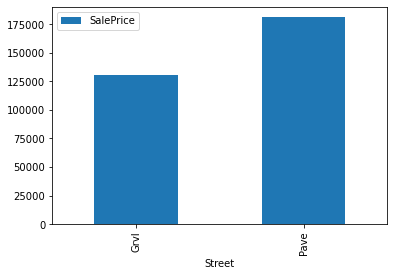

Alley | STD/MEAN = 0.2


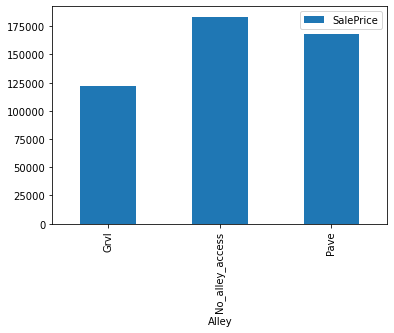

LotShape | STD/MEAN = 0.15


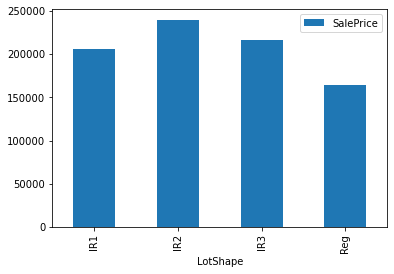

LandContour | STD/MEAN = 0.2


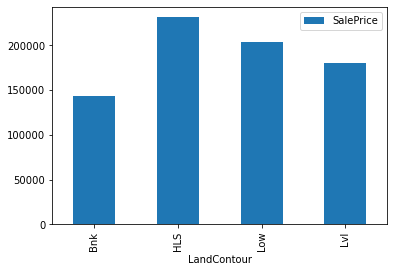

Utilities | STD/MEAN = 0.19


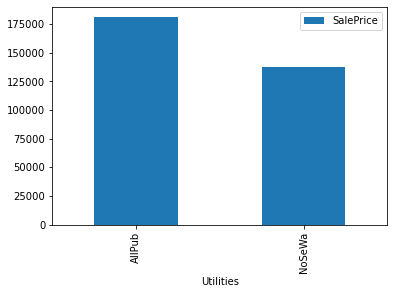

LotConfig | STD/MEAN = 0.11


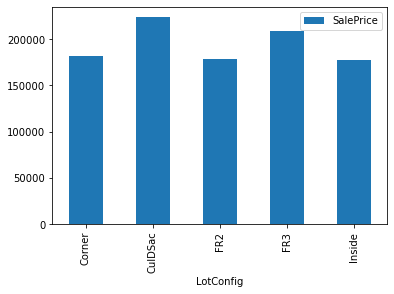

Neighborhood | STD/MEAN = 0.36


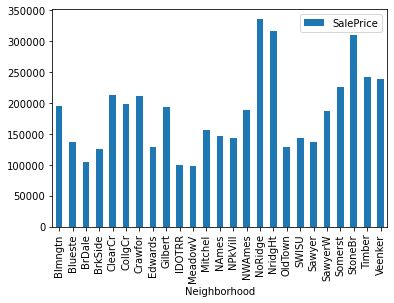

Condition1 | STD/MEAN = 0.19


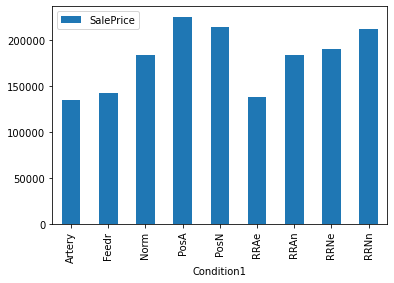

Condition2 | STD/MEAN = 0.47


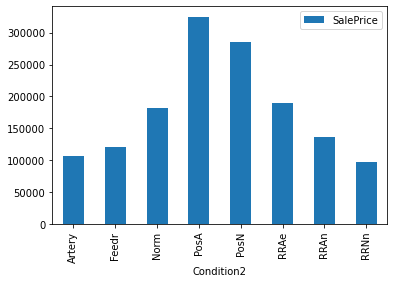

BldgType | STD/MEAN = 0.18


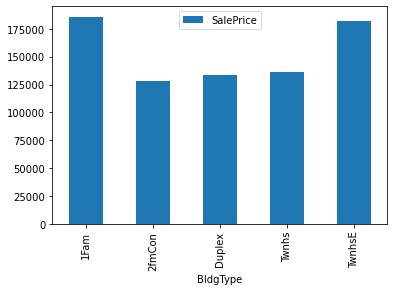

HouseStyle | STD/MEAN = 0.22


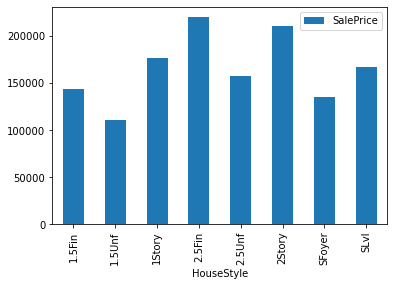

OverallQual | STD/MEAN = 0.71


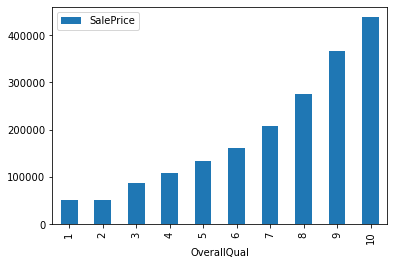

OverallCond | STD/MEAN = 0.33


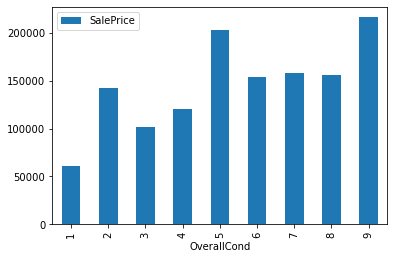

RoofStyle | STD/MEAN = 0.15


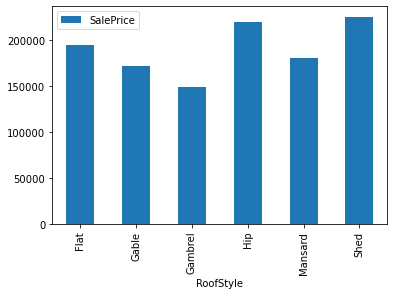

RoofMatl | STD/MEAN = 0.37


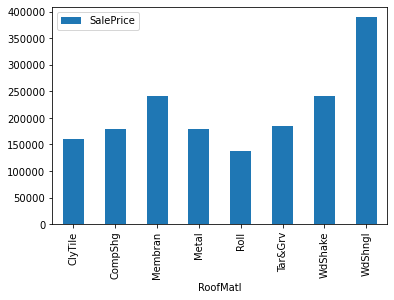

Exterior1st | STD/MEAN = 0.35


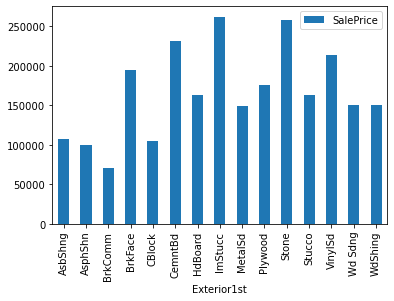

Exterior2nd | STD/MEAN = 0.32


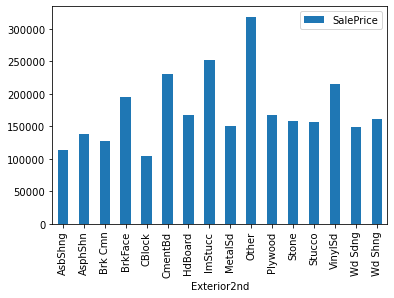

MasVnrType | STD/MEAN = 0.25


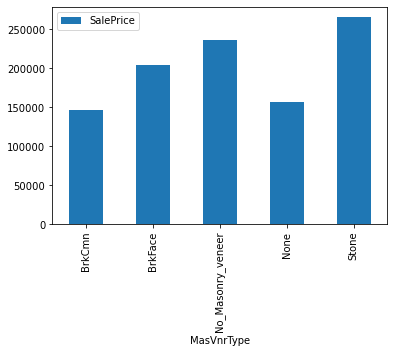

ExterQual | STD/MEAN = 0.59


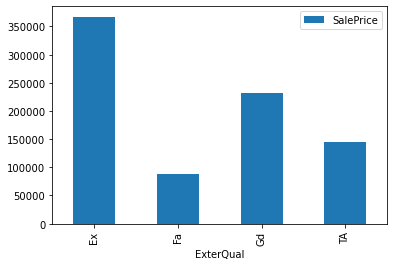

ExterCond | STD/MEAN = 0.37


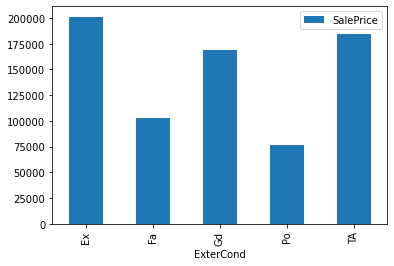

Foundation | STD/MEAN = 0.26


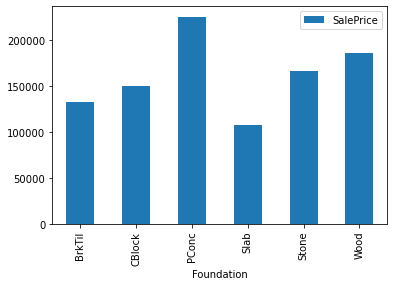

BsmtQual | STD/MEAN = 0.51


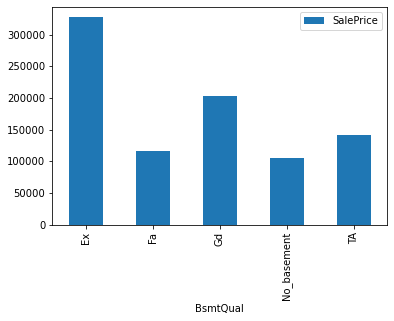

BsmtCond | STD/MEAN = 0.44


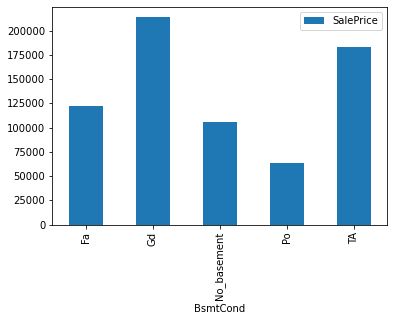

BsmtExposure | STD/MEAN = 0.3


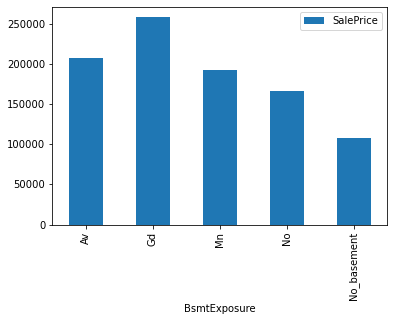

BsmtFinType1 | STD/MEAN = 0.24


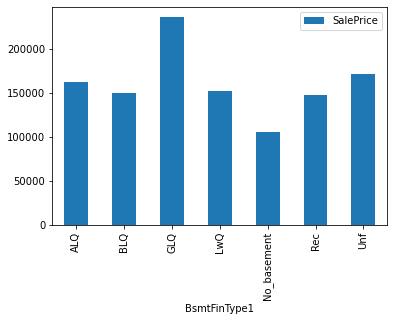

BsmtFinType2 | STD/MEAN = 0.19


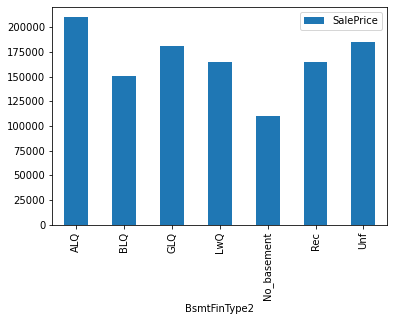

Heating | STD/MEAN = 0.4


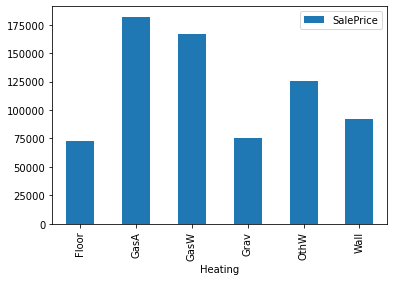

HeatingQC | STD/MEAN = 0.32


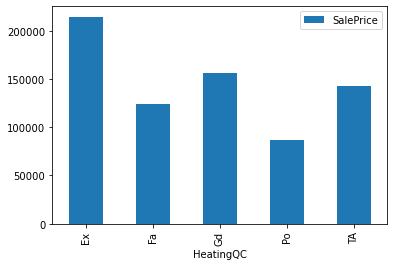

CentralAir | STD/MEAN = 0.39


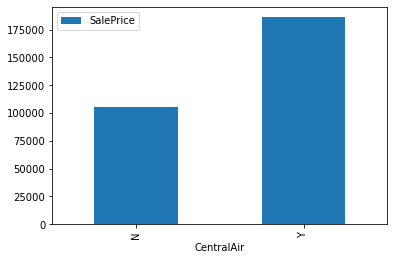

Electrical | STD/MEAN = 0.36


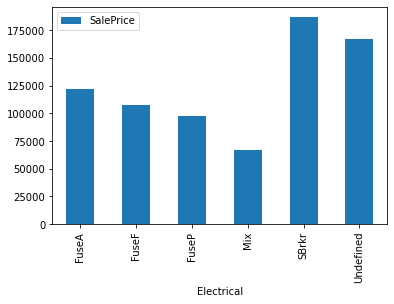

KitchenQual | STD/MEAN = 0.5


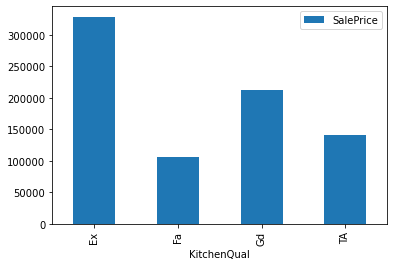

Functional | STD/MEAN = 0.22


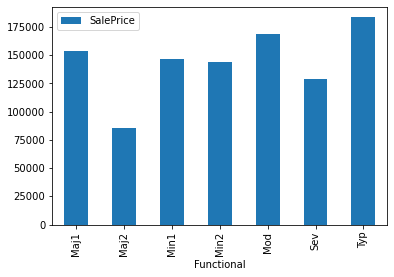

FireplaceQu | STD/MEAN = 0.38


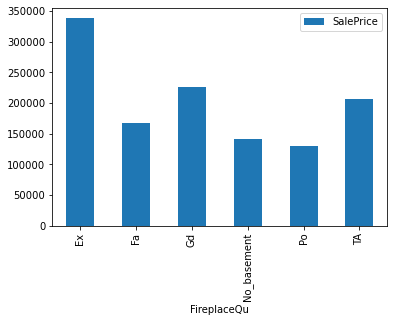

GarageType | STD/MEAN = 0.34


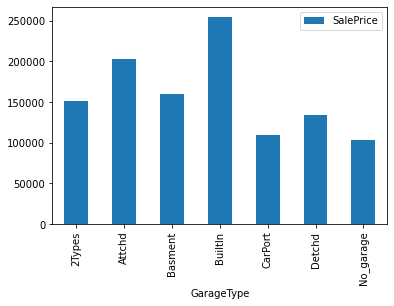

GarageFinish | STD/MEAN = 0.35


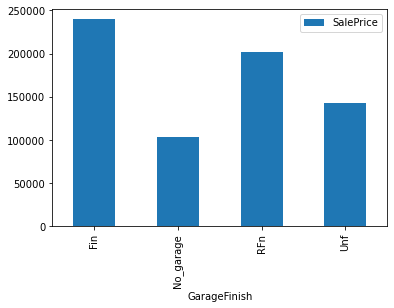

GarageQual | STD/MEAN = 0.38


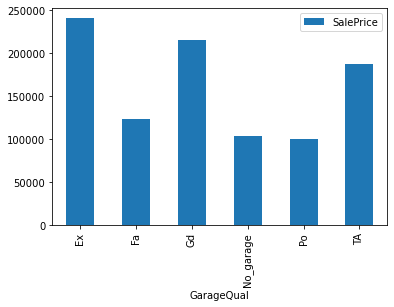

GarageCond | STD/MEAN = 0.28


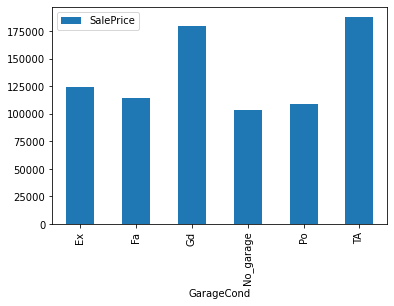

PavedDrive | STD/MEAN = 0.26


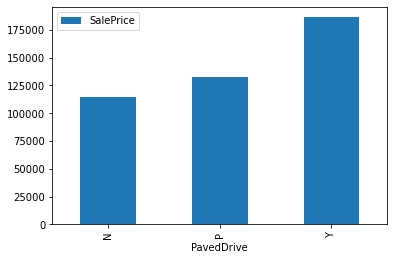

PoolQC | STD/MEAN = 0.54


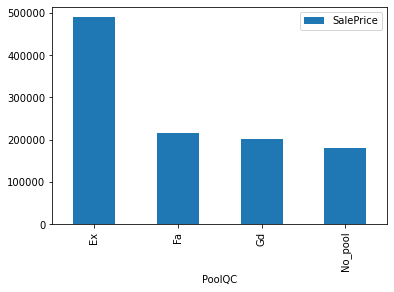

Fence | STD/MEAN = 0.15


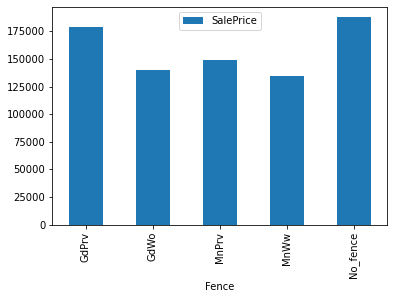

MiscFeature | STD/MEAN = 0.33


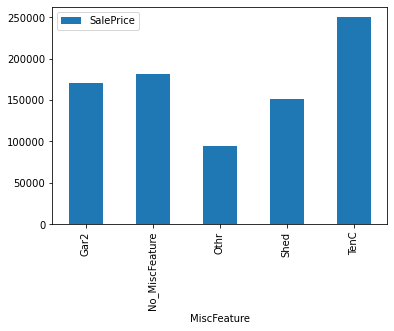

MoSold | STD/MEAN = 0.04


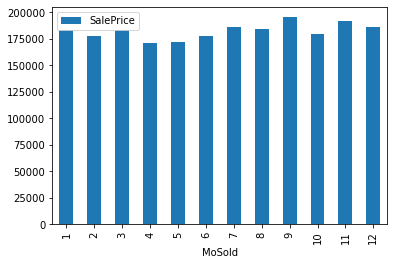

YrSold | STD/MEAN = 0.02


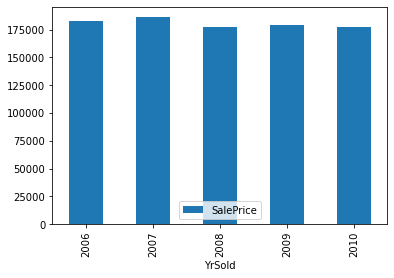

SaleType | STD/MEAN = 0.31


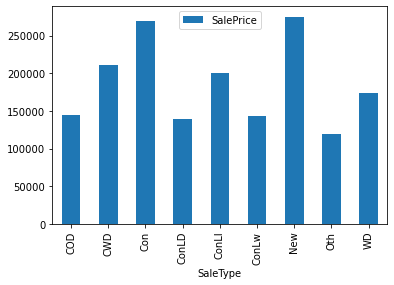

SaleCondition | STD/MEAN = 0.33


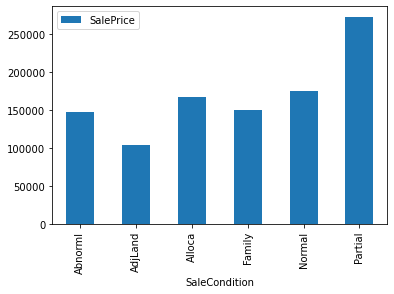

In [194]:
for i in cat_features:
    print(i, 
          '| STD/MEAN =', 
          (df.groupby([i])[['SalePrice']].mean().std()/df.groupby([i])[['SalePrice']].mean().mean()).values[0].round(2))
    df.groupby([i])[['SalePrice']].mean().round().plot.bar()
    plt.show()

In [77]:
for f in cat_features:
    ohe = pd.get_dummies(df_united[f], prefix = f)
    df_united = pd.concat([df_united, ohe], axis=1)
    features.extend(ohe.columns)

In [78]:
df_cleaned = df_united.copy()

In [79]:
for f in cat_features:
    del df_cleaned[f]
del df_cleaned['LandSlope']
del df_cleaned['MoSold']
del df_cleaned['YrSold']
del df_cleaned['MSZoning_Undefined']
del df_cleaned['Utilities_Undefined']
del df_cleaned['Exterior1st_Undefined']
del df_cleaned['Exterior2nd_Undefined']
del df_cleaned['Electrical_Undefined']
del df_cleaned['KitchenQual_Undefined']
df_cleaned

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,1970,1970,0.0,0.0,0.0,546.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,21.0,1894,1970,1970,0.0,252.0,0.0,294.0,546.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,160.0,20000,1960,1996,0.0,1224.0,0.0,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,62.0,10441,1992,1992,0.0,337.0,0.0,575.0,912.0,...,0,0,0,1,0,0,0,0,1,0


### 'LotFrontage' processing

In [107]:
df_cleaned_temp = df_cleaned.dropna().copy()

In [159]:
temp_target = 'LotFrontage'

temp_features = [
     'LotArea',
     'YearBuilt',
     'YearRemodAdd',
     'MasVnrArea',
     'BsmtFinSF1',
     'BsmtFinSF2',
     'BsmtUnfSF',
     'TotalBsmtSF',
     '1stFlrSF',
     '2ndFlrSF',
     'LowQualFinSF',
     'GrLivArea',
     'BsmtFullBath',
     'BsmtHalfBath',
     'FullBath',
     'HalfBath',
     'BedroomAbvGr',
     'KitchenAbvGr',
     'TotRmsAbvGrd',
     'Fireplaces',
     'GarageYrBlt',
     'GarageCars',
     'GarageArea',
     'WoodDeckSF',
     'OpenPorchSF',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'MiscVal',
     'MSSubClass_20',
     'MSSubClass_30',
     'MSSubClass_40',
     'MSSubClass_45',
     'MSSubClass_50',
     'MSSubClass_60',
     'MSSubClass_70',
     'MSSubClass_75',
     'MSSubClass_80',
     'MSSubClass_85',
     'MSSubClass_90',
     'MSSubClass_120',
     'MSSubClass_150',
     'MSSubClass_160',
     'MSSubClass_180',
     'MSSubClass_190',
     'MSZoning_C (all)',
     'MSZoning_FV',
     'MSZoning_RH',
     'MSZoning_RL',
     'MSZoning_RM',
     'Street_Grvl',
     'Street_Pave',
     'Alley_Grvl',
     'Alley_No_alley_access',
     'Alley_Pave',
     'LotShape_IR1',
     'LotShape_IR2',
     'LotShape_IR3',
     'LotShape_Reg',
     'LandContour_Bnk',
     'LandContour_HLS',
     'LandContour_Low',
     'LandContour_Lvl',
     'Utilities_AllPub',
     'Utilities_NoSeWa',
     'LotConfig_Corner',
     'LotConfig_CulDSac',
     'LotConfig_FR2',
     'LotConfig_FR3',
     'LotConfig_Inside',
     'Neighborhood_Blmngtn',
     'Neighborhood_Blueste',
     'Neighborhood_BrDale',
     'Neighborhood_BrkSide',
     'Neighborhood_ClearCr',
     'Neighborhood_CollgCr',
     'Neighborhood_Crawfor',
     'Neighborhood_Edwards',
     'Neighborhood_Gilbert',
     'Neighborhood_IDOTRR',
     'Neighborhood_MeadowV',
     'Neighborhood_Mitchel',
     'Neighborhood_NAmes',
     'Neighborhood_NPkVill',
     'Neighborhood_NWAmes',
     'Neighborhood_NoRidge',
     'Neighborhood_NridgHt',
     'Neighborhood_OldTown',
     'Neighborhood_SWISU',
     'Neighborhood_Sawyer',
     'Neighborhood_SawyerW',
     'Neighborhood_Somerst',
     'Neighborhood_StoneBr',
     'Neighborhood_Timber',
     'Neighborhood_Veenker',
     'Condition1_Artery',
     'Condition1_Feedr',
     'Condition1_Norm',
     'Condition1_PosA',
     'Condition1_PosN',
     'Condition1_RRAe',
     'Condition1_RRAn',
     'Condition1_RRNe',
     'Condition1_RRNn',
     'Condition2_Artery',
     'Condition2_Feedr',
     'Condition2_Norm',
     'Condition2_PosA',
     'Condition2_PosN',
     'Condition2_RRAe',
     'Condition2_RRAn',
     'Condition2_RRNn',
     'BldgType_1Fam',
     'BldgType_2fmCon',
     'BldgType_Duplex',
     'BldgType_Twnhs',
     'BldgType_TwnhsE',
     'HouseStyle_1.5Fin',
     'HouseStyle_1.5Unf',
     'HouseStyle_1Story',
     'HouseStyle_2.5Fin',
     'HouseStyle_2.5Unf',
     'HouseStyle_2Story',
     'HouseStyle_SFoyer',
     'HouseStyle_SLvl',
     'OverallQual_1',
     'OverallQual_2',
     'OverallQual_3',
     'OverallQual_4',
     'OverallQual_5',
     'OverallQual_6',
     'OverallQual_7',
     'OverallQual_8',
     'OverallQual_9',
     'OverallQual_10',
     'OverallCond_1',
     'OverallCond_2',
     'OverallCond_3',
     'OverallCond_4',
     'OverallCond_5',
     'OverallCond_6',
     'OverallCond_7',
     'OverallCond_8',
     'OverallCond_9',
     'RoofStyle_Flat',
     'RoofStyle_Gable',
     'RoofStyle_Gambrel',
     'RoofStyle_Hip',
     'RoofStyle_Mansard',
     'RoofStyle_Shed',
     'RoofMatl_ClyTile',
     'RoofMatl_CompShg',
     'RoofMatl_Membran',
     'RoofMatl_Metal',
     'RoofMatl_Roll',
     'RoofMatl_Tar&Grv',
     'RoofMatl_WdShake',
     'RoofMatl_WdShngl',
     'Exterior1st_AsbShng',
     'Exterior1st_AsphShn',
     'Exterior1st_BrkComm',
     'Exterior1st_BrkFace',
     'Exterior1st_CBlock',
     'Exterior1st_CemntBd',
     'Exterior1st_HdBoard',
     'Exterior1st_ImStucc',
     'Exterior1st_MetalSd',
     'Exterior1st_Plywood',
     'Exterior1st_Stone',
     'Exterior1st_Stucco',
     'Exterior1st_VinylSd',
     'Exterior1st_Wd Sdng',
     'Exterior1st_WdShing',
     'Exterior2nd_AsbShng',
     'Exterior2nd_AsphShn',
     'Exterior2nd_Brk Cmn',
     'Exterior2nd_BrkFace',
     'Exterior2nd_CBlock',
     'Exterior2nd_CmentBd',
     'Exterior2nd_HdBoard',
     'Exterior2nd_ImStucc',
     'Exterior2nd_MetalSd',
     'Exterior2nd_Other',
     'Exterior2nd_Plywood',
     'Exterior2nd_Stone',
     'Exterior2nd_Stucco',
     'Exterior2nd_VinylSd',
     'Exterior2nd_Wd Sdng',
     'Exterior2nd_Wd Shng',
     'MasVnrType_BrkCmn',
     'MasVnrType_BrkFace',
     'MasVnrType_No_Masonry_veneer',
     'MasVnrType_None',
     'MasVnrType_Stone',
     'ExterQual_Ex',
     'ExterQual_Fa',
     'ExterQual_Gd',
     'ExterQual_TA',
     'ExterCond_Ex',
     'ExterCond_Fa',
     'ExterCond_Gd',
     'ExterCond_Po',
     'ExterCond_TA',
     'Foundation_BrkTil',
     'Foundation_CBlock',
     'Foundation_PConc',
     'Foundation_Slab',
     'Foundation_Stone',
     'Foundation_Wood',
     'BsmtQual_Ex',
     'BsmtQual_Fa',
     'BsmtQual_Gd',
     'BsmtQual_No_basement',
     'BsmtQual_TA',
     'BsmtCond_Fa',
     'BsmtCond_Gd',
     'BsmtCond_No_basement',
     'BsmtCond_Po',
     'BsmtCond_TA',
     'BsmtExposure_Av',
     'BsmtExposure_Gd',
     'BsmtExposure_Mn',
     'BsmtExposure_No',
     'BsmtExposure_No_basement',
     'BsmtFinType1_ALQ',
     'BsmtFinType1_BLQ',
     'BsmtFinType1_GLQ',
     'BsmtFinType1_LwQ',
     'BsmtFinType1_No_basement',
     'BsmtFinType1_Rec',
     'BsmtFinType1_Unf',
     'BsmtFinType2_ALQ',
     'BsmtFinType2_BLQ',
     'BsmtFinType2_GLQ',
     'BsmtFinType2_LwQ',
     'BsmtFinType2_No_basement',
     'BsmtFinType2_Rec',
     'BsmtFinType2_Unf',
     'Heating_Floor',
     'Heating_GasA',
     'Heating_GasW',
     'Heating_Grav',
     'Heating_OthW',
     'Heating_Wall',
     'HeatingQC_Ex',
     'HeatingQC_Fa',
     'HeatingQC_Gd',
     'HeatingQC_Po',
     'HeatingQC_TA',
     'CentralAir_N',
     'CentralAir_Y',
     'Electrical_FuseA',
     'Electrical_FuseF',
     'Electrical_FuseP',
     'Electrical_Mix',
     'Electrical_SBrkr',
     'KitchenQual_Ex',
     'KitchenQual_Fa',
     'KitchenQual_Gd',
     'KitchenQual_TA',
     'Functional_Maj1',
     'Functional_Maj2',
     'Functional_Min1',
     'Functional_Min2',
     'Functional_Mod',
     'Functional_Sev',
     'Functional_Typ',
     'FireplaceQu_Ex',
     'FireplaceQu_Fa',
     'FireplaceQu_Gd',
     'FireplaceQu_No_basement',
     'FireplaceQu_Po',
     'FireplaceQu_TA',
     'GarageType_2Types',
     'GarageType_Attchd',
     'GarageType_Basment',
     'GarageType_BuiltIn',
     'GarageType_CarPort',
     'GarageType_Detchd',
     'GarageType_No_garage',
     'GarageFinish_Fin',
     'GarageFinish_No_garage',
     'GarageFinish_RFn',
     'GarageFinish_Unf',
     'GarageQual_Ex',
     'GarageQual_Fa',
     'GarageQual_Gd',
     'GarageQual_No_garage',
     'GarageQual_Po',
     'GarageQual_TA',
     'GarageCond_Ex',
     'GarageCond_Fa',
     'GarageCond_Gd',
     'GarageCond_No_garage',
     'GarageCond_Po',
     'GarageCond_TA',
     'PavedDrive_N',
     'PavedDrive_P',
     'PavedDrive_Y',
     'PoolQC_Ex',
     'PoolQC_Fa',
     'PoolQC_Gd',
     'PoolQC_No_pool',
     'Fence_GdPrv',
     'Fence_GdWo',
     'Fence_MnPrv',
     'Fence_MnWw',
     'Fence_No_fence',
     'MiscFeature_Gar2',
     'MiscFeature_No_MiscFeature',
     'MiscFeature_Othr',
     'MiscFeature_Shed',
     'MiscFeature_TenC',
     'SaleType_COD',
     'SaleType_CWD',
     'SaleType_Con',
     'SaleType_ConLD',
     'SaleType_ConLI',
     'SaleType_ConLw',
     'SaleType_New',
     'SaleType_Oth',
     'SaleType_WD',
     'SaleCondition_Abnorml',
     'SaleCondition_AdjLand',
     'SaleCondition_Alloca',
     'SaleCondition_Family',
     'SaleCondition_Normal',
     'SaleCondition_Partial'
]

In [160]:
x = df_cleaned_temp[temp_features].to_numpy()
y = df_cleaned_temp[temp_target].to_numpy()

In [161]:
from sklearn.preprocessing import StandardScaler

temp_scaler = StandardScaler()
x_norm = temp_scaler.fit_transform(x)
x_norm.shape

(2433, 329)

In [162]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=17)

In [164]:
Lasso = LassoCV()

In [165]:
Lasso.fit(x_train, y_train)

LassoCV()

In [166]:
print(f'''
    
    Score:
    train {mean_squared_error(y_train, Lasso.predict(x_train))**0.5:.3f}
    test {mean_squared_error(y_test, Lasso.predict(x_test))**0.5:.3f}  

''')

# линейные веса параметров: чем больше по модулю, тем больше влияние
pd.DataFrame(zip(temp_features, Lasso.coef_)).sort_values(by=1, key=lambda r: -abs(r))

# Mean square error rooted with all features:
# train 13.380
# test 15.409  


    
    Score:
    train 13.380
    test 15.409  




,0,1
0,LotArea,7.121325
67,LotConfig_CulDSac,-4.559910
117,BldgType_TwnhsE,-4.113110
116,BldgType_Twnhs,-3.696203
66,LotConfig_Corner,3.591324
...,...,...
147,RoofStyle_Gambrel,-0.000000
148,RoofStyle_Hip,0.000000
149,RoofStyle_Mansard,0.000000
4,BsmtFinSF1,0.000000


In [167]:
Lasso.fit(x_norm, y)

LassoCV()

In [183]:
df_cleaned['LotFrontage_predicted'] = Lasso.predict(temp_scaler.transform(df_cleaned[temp_features].to_numpy()))

In [189]:
df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage_predicted'], inplace = True)
del df_cleaned['LotFrontage_predicted']

### Saving

In [190]:
df_cleaned = df_cleaned.astype('float64')

In [191]:
df_cleaned.to_csv('./house_prices_united_cleaned_data.csv', index=False)